In [1]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
# local imports
import Plotting as myplt

In [2]:
# paths
path_fig  = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Figures\\'
path_data = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Data\\'

# Data

In [3]:
# store files names for all datasets
filenames: dict[str,str] = {
   'Laser 1s'   : path_data + '2-Slit Interference Lab - Laser Single Slit-8_24_23.csv',
   'Laser 2s'   : path_data + '2-Slit Interference Lab - Laser Interference Pattern (fine)-8_24_23.csv',
   'Bulb 2s t1' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern-8_31_23.csv',
   'Bulb 2s t2' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern 2.csv',
   'Bulb 2s t3' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern 3.csv'
} # s==slit, t==trial

In [4]:
def UnpackTable(fname: str) -> dict[str,np.array] :
    """Get a table dictionary like {x: xdata, y: ydata} from a CSV file containing data""" 
    # get data from the csv file
    arr = np.genfromtxt(fname, delimiter=",", dtype=str)
    # separate column names and data arrays 
    cols = np.array(arr[0 ], dtype=str)
    data = np.array(arr[1:], dtype=float).T # transpose to get x and y
    # build dictionary to hold the table {x: xdata, y: ydata}
    table = {}
    for col, dat in zip(cols,data) : 
        table[col] = dat
    return table

def UnpackAllTables(filenames: dict[str,str]) -> dict[str, dict[str, np.array]] : 
    """Unpack all tables in the filenames dictionary."""
    tables: dict[str, dict[str, np.array]] = {}
    for experiment, file in filenames.items() :
        # extract data from file 
        tables[experiment] = UnpackTable(file)
        # print some helpful info 
        print(experiment, 'columns:\t', list(tables[experiment].keys() ))
    return tables

tables: dict[str, dict[str, np.array]] = UnpackAllTables(filenames)

Laser 1s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Laser 2s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Bulb 2s t1 columns:	 ['Micrometer Position (mm)', 'Counts/10s', 'Photon/S (Hz)']
Bulb 2s t2 columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']
Bulb 2s t3 columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']


# Fit

In [16]:
# find maxima
def GetI0(tables: dict[str, dict[str, np.array]]) : 
    """Gets the value of the central maximum as I0"""
    # loop for each item 
    for keyExperiment,valueDict in tables.items() : 
        if('Voltage (V)' in valueDict) : 
            valueDict['I0'] = max(valueDict['Voltage (V)'])
        elif('Photon/S (Hz)' in valueDict) :
            valueDict['I0'] = max(valueDict['Photon/S (Hz)'])
        else : 
            raise Exception('Invalid key')
        print(keyExperiment, 'I0 :\t',valueDict['I0'])
        
GetI0(tables)

Laser 1s I0 :	 0.288
Laser 2s I0 :	 0.41
Bulb 2s t1 I0 :	 251.6
Bulb 2s t2 I0 :	 240.0
Bulb 2s t3 I0 :	 243.3


In [7]:
def GetXShift(tables, experimentKey, xKey, yKey) : 
    return tables[experimentKey][xKey] [ # get x position of maximum
            np.where( 
                tables[experimentKey][yKey] == max(tables[experimentKey][yKey]) # get index of maximum 
            ) [0] 
        ]

def GetYShift(tables, experimentKey, yKey) : 
    return tables[experimentKey][yKey] [0] # assumes edge is noise 

def GetX(range=(-5.5, 5.5)) : 
    return np.linspace(range[0], range[1], 1000)

def Envelope(x, I0, beta) : 
    return I0 * (np.cos(x*beta))**2

def Interference(x, I0, alpha) : 
    return I0 * (np.sin(x*alpha))**2

def I(x, I0, alpha, beta) : 
    return I0 * (np.cos(x*beta))**2 * (np.sin(x*alpha))**2

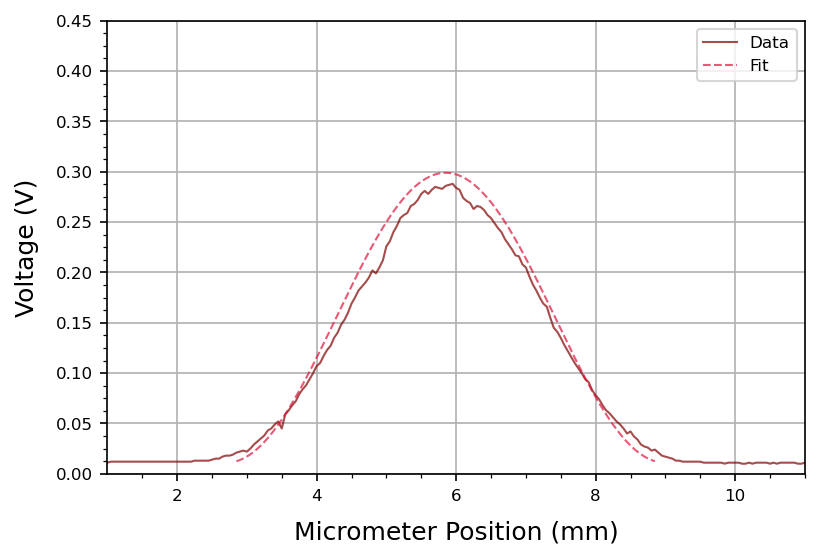

In [58]:
expKey = 'Laser 1s'

tables[expKey]['Alpha'] = 0
tables[expKey]['Beta']  = 0.5
xfit = GetX((-3,3,))
yfit = Envelope(xfit, tables[expKey]['I0'], tables[expKey]['Beta'])

myplt.PlotMultiXY(
    x = [   tables[expKey]['Micrometer Position (mm)'], 
            xfit + GetXShift(tables, expKey, 'Micrometer Position (mm)', 'Voltage (V)') - 0.1],
    y = [   tables[expKey]['Voltage (V)'],
            yfit + GetYShift(tables, expKey, 'Voltage (V)') ],
    color       = [ 'maroon', 'crimson' ],
    linestyle   = ['-','--'],
    legend      = [ 'Data', 'Fit' ],
    xlab        = 'Micrometer Position (mm)',
    ylab        = 'Voltage (V)',
    xlim        = [ 1, 11 ],
    ylim        = [ 0, 0.45 ],
    fileName    = path_fig + 'Fit_Laser1s.png'
)

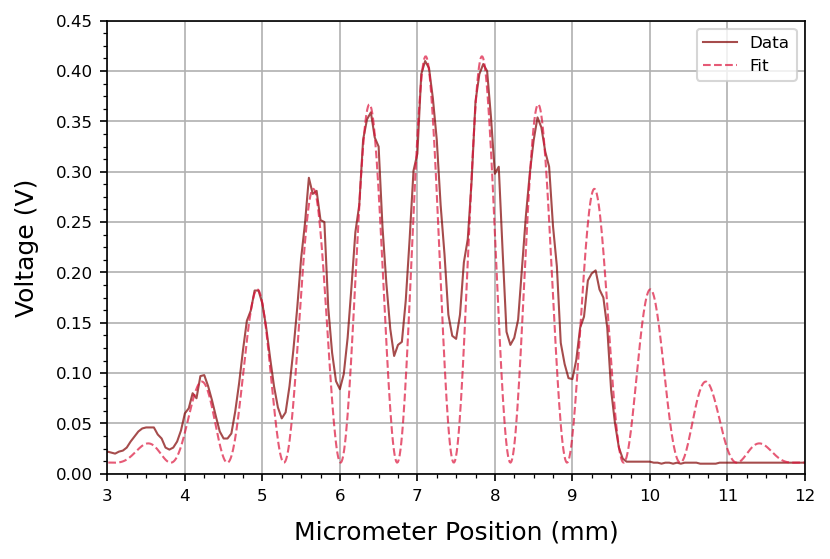

In [59]:
expKey = 'Laser 2s'

tables[expKey]['Alpha'] = 4.3
tables[expKey]['Beta']  = 0.34
xfit = GetX()
yfit = I(xfit, tables[expKey]['I0'], tables[expKey]['Alpha'], tables[expKey]['Beta'])

myplt.PlotMultiXY(
    x = [   tables[expKey]['Micrometer Position (mm)'], 
            xfit + GetXShift(tables, expKey, 'Micrometer Position (mm)', 'Voltage (V)') + 0.37 ],
    y = [   tables[expKey]['Voltage (V)'],
            yfit + GetYShift(tables, expKey, 'Voltage (V)') ],
    color       = [ 'maroon', 'crimson' ],
    linestyle   = ['-','--'],
    legend      = [ 'Data', 'Fit' ],
    xlab        = 'Micrometer Position (mm)',
    ylab        = 'Voltage (V)',
    xlim        = [ 3, 12 ],
    ylim        = [ 0, 0.45 ],
    fileName    = path_fig + 'Fit_Laser2s.png'
)